In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pareto
import random
import functions as f

In [2]:
#GLOBAL CONSTANTS
clv_theory = 10 
size= 10000 # size of each sample
n = 10000 # number of samples
DureeObs = 12*2 # duration of observation

# Geometric estimator (not censored)

We assume that the distribution followed by the lifetime values of customers is geometric (the success would be defined by the event of "churn"). Here, we suppose also that the data is not censored which means that all the lifetime values are known.

**CLV computing**

In [3]:
# CONSTANT desining if the data is going to be censored or not
censored = 0
# Monte Carlo simulation
clv_geom, Y_n = f.monte_carlo(clv_theory, size, n, censored, f.geom_clv_estimator, f.generate_exponential_perfect)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10.00 
 	 CLV real = 10.000630  
 	 Standard deviation CLV= 0.099373


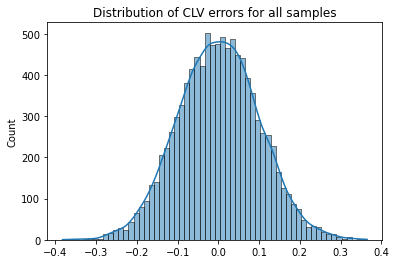

In [4]:
# plot clv errors distribution
f.print_conv_plot_distribution(size, n ,clv_theory, clv_geom)

**Confidence interval**

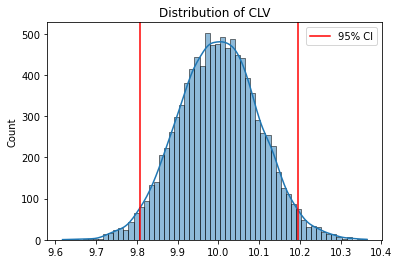

IC = [9.81 , 10.19 ] 


In [5]:
lower_geom_nc, upper_geom_nc = f.CI_plot_95(clv_geom, 0.05)

In [6]:
# GENERATE one sample to study the effect of boostrapping
Y_n = f.generate_exponential_perfect(clv_theory, size)

In [7]:
_ , clv_geom_b = f.bootstrap_samples(Y_n, censored, f.geom_clv_estimator)

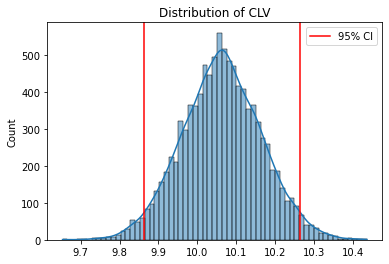

IC = [9.86 , 10.26 ] 


In [8]:
lower_geom_ncb, upper_geom_ncb  = f.CI_plot_95(clv_geom_b, 0.05)

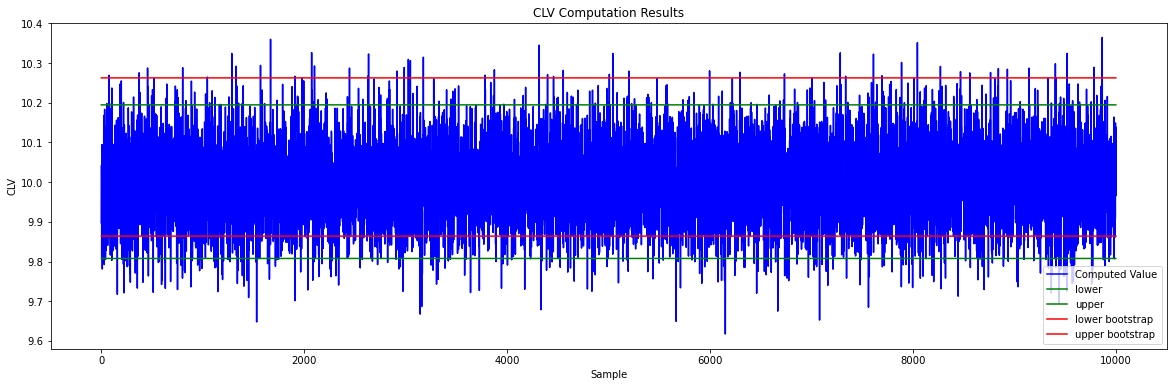

In [9]:
# plot confidence interval
f.CI_monoplot(clv_geom, np.full(size, lower_geom_nc),np.full(size, upper_geom_nc), np.full(size, lower_geom_ncb),np.full(size, upper_geom_ncb) )

## Geometric (censored)

**CLV computing**

In [10]:
# CONSTANT
censored = 1
# Monte Carlo simulation
clv_geom_c, Y_n = f.monte_carlo(clv_theory, size, n, censored, f.geom_c_clv_estimator, f.generate_exponential)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10.00 
 	 CLV real = 10.000470  
 	 Standard deviation CLV= 0.127781


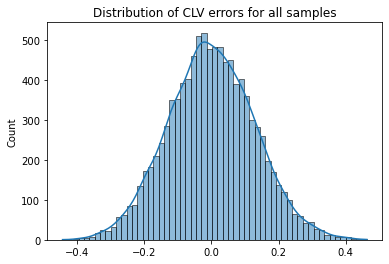

In [11]:
f.print_conv_plot_distribution(size, n ,clv_theory, clv_geom_c)

We still have a centered Gaussian error but the standard deviation with censored data has increased, which means that the model's predictions are less precise and have a higher degree of uncertainty.

**Confidence interval**

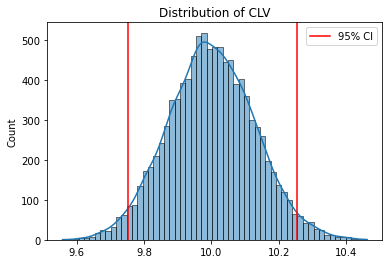

IC = [9.75 , 10.26 ] 


In [12]:
lower_geom_c, upper_geom_c = f.CI_plot_95(clv_geom_c, 0.05)

In [13]:
# GENERATE one sample to study the effect of boostrapping
Y_n =[]
T, A = f.generate_exponential(clv_theory, size, DureeObs)
Y_n.append(T)
Y_n.append(A)

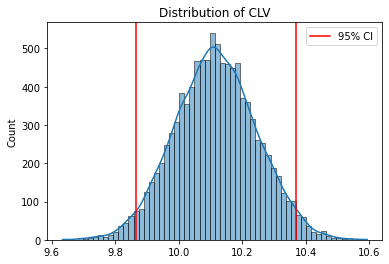

IC = [9.86 , 10.37 ] 


In [14]:
_,_ , clv_geom_cb = f.bootstrap_samples(Y_n, censored, f.geom_c_clv_estimator)
lower_geom_cb, upper_geom_cb  = f.CI_plot_95(clv_geom_cb, 0.05)

In [15]:
print("Confidence level : %.2f" % (f.confidence_lvl(lower_geom_cb, upper_geom_cb, clv_geom_c)))

Confidence level : 85.36


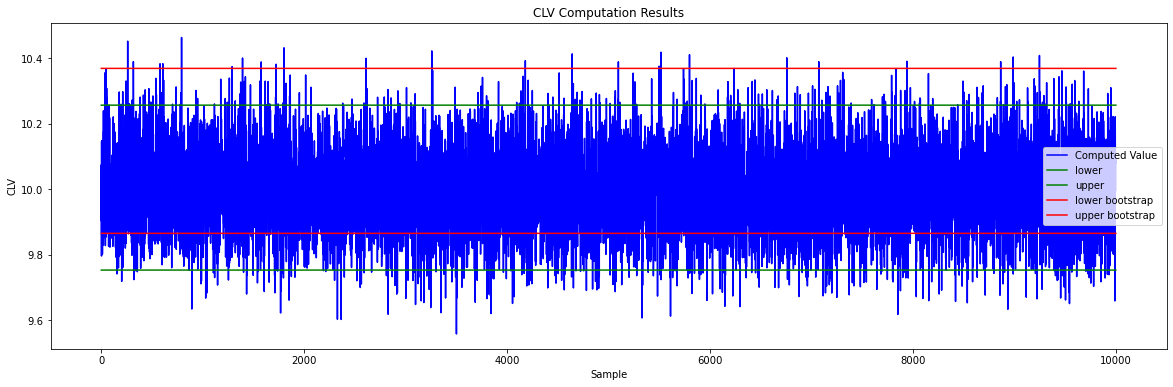

In [16]:
# plot confidence interval
f.CI_monoplot(clv_geom_c, np.full(size, lower_geom_c),np.full(size, upper_geom_c), np.full(size, lower_geom_cb),np.full(size, upper_geom_cb) )

**Confidence interval standard deviation comparison (censored vs not censored)**

In [17]:
f.plot_bar_std(std_lower_geom_nc, std_lower_geom_c, 'GEOMETRIC DISTRIBUTION - Comparison of CI lower bound std ')
f.plot_bar_std(std_upper_geom_nc, std_upper_geom_c, 'GEOMETRIC DISTRIBUTION - Comparison of CI upper bound std ')

NameError: name 'std_lower_geom_nc' is not defined

Based on the plotted results, it can be observed that the standard deviation for the upper and lower bounds of the confidence interval increases when censored data is added to the analysis. This indicates that incorporating censored data into the model results in a wider confidence interval, which in turn implies a higher degree of uncertainty in the predictions. Therefore, the addition of censored data can lead to less precise and more uncertain predictions, as reflected in the wider confidence intervals.